![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
orp=pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv',encoding='latin1')


In [229]:
# Print out First 5 rows from dataframe
# Your code here
orp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [230]:
# Print out brief info
orp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [231]:
# Your code here
orp.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [232]:
# List all NaN values
orp[orp['Description'].isna() | orp['CustomerID'].isna()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
280973,561513,47566,PARTY BUNTING,8,7/27/11 15:12,5.79,NaN,United Kingdom
317982,564818,20676,RED RETROSPOT BOWL,1,8/30/11 12:10,2.46,NaN,United Kingdom
243642,558475,20616,CHERRY BLOSSOM PASSPORT COVER,2,6/29/11 15:58,1.63,NaN,United Kingdom
405218,571713,22068,BLACK PIRATE TREASURE CHEST,1,10/18/11 16:58,3.29,NaN,United Kingdom
208952,555150,22853,CAT BOWL VINTAGE CREAM,20,5/31/11 15:53,6.63,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
orp=orp[orp['Quantity']>=0]

**Exclude negative Price entries**

In [234]:
orp=orp[orp['UnitPrice']>=0]
orp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531283 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531283 non-null object
StockCode      531283 non-null object
Description    530691 non-null object
Quantity       531283 non-null int64
InvoiceDate    531283 non-null object
UnitPrice      531283 non-null float64
CustomerID     397924 non-null float64
Country        531283 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [235]:
orp.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [0]:
orp['CustomerID']=orp['CustomerID'].astype('category')

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

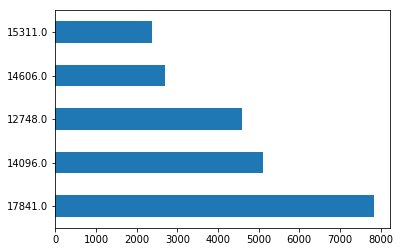

In [237]:
# Your code here
orp[orp['Country']=='United Kingdom']['CustomerID'].value_counts().head(5).plot(kind='barh')



**The customer with the highest money spent on purchases comes from Netherlands**

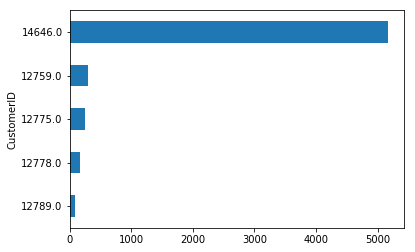

In [238]:
# Your code here

orp[orp['Country']=='Netherlands'].groupby('CustomerID').sum()['UnitPrice'].sort_values().tail(5).plot(kind='barh')


**On which year had the highest sales?**


In [0]:
orp['InvoiceDate']=pd.to_datetime(orp['InvoiceDate'],format='%m/%d/%y %H:%M')
times = pd.DatetimeIndex(orp.InvoiceDate)

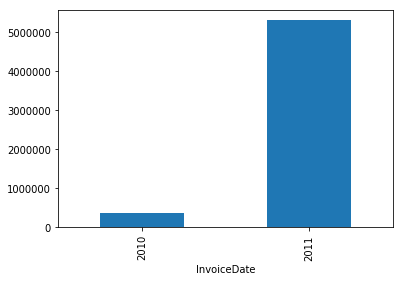

In [240]:

orp.groupby(times.year).sum()['Quantity'].plot(kind='bar')

**Make a plot about number of orders per hour**



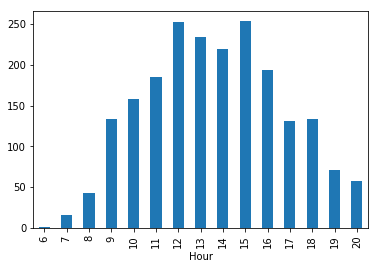

In [241]:
temp=orp.groupby([times.hour,times.date]).count()

temp2=temp.index.to_frame(name=['Hour','Date'])
temp['Hour']=temp2['Hour']

temp.groupby('Hour').mean()['InvoiceNo'].plot(kind='bar')

**How many orders (per month)?**

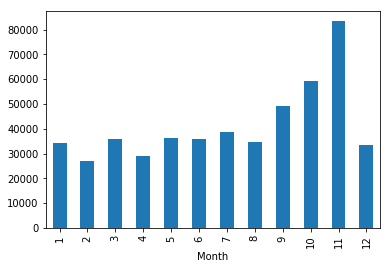

In [242]:
temp=orp.groupby([times.month,times.year]).count()

temp2=temp.index.to_frame(name=['Month','Year'])
temp['Month']=temp2['Month']

temp.groupby('Month').mean()['InvoiceNo'].plot(kind='bar')


**Top 10 items most sales**

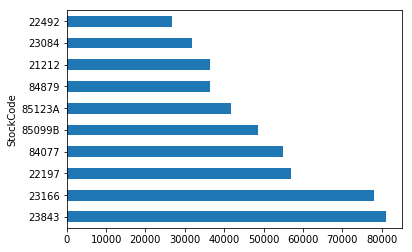

In [243]:
orp.groupby('StockCode').sum().sort_values(by='Quantity',ascending=False)['Quantity'].head(10).plot(kind='barh')

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

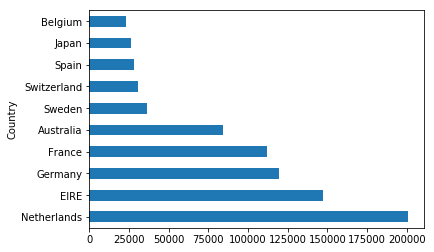

In [244]:
orp[ orp['Country']!='United Kingdom'].groupby('Country').sum()['Quantity'].sort_values(ascending=False).head(10).plot(kind='barh')

### You are awesome!!